
# Student Performance Regression Analysis

We will go step by step:
1. Load and explore the dataset (`Student_Performance.csv`)
2. Preprocess the data (encode categoricals, split train/test)
3. Train a **Linear Regression** model
4. Analyze coefficients
5. Evaluate model performance

## Import the Libraries

In [48]:

# Install required packages if not already installed
# %pip install -q pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Path to dataset
CSV_PATH = "Student_Performance.csv"


## 1. Load & Explore the Dataset


In [50]:
df = pd.read_csv(CSV_PATH)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [51]:
print("Shape:", df.shape)
display(df.head())

Shape: (10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [52]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


In [53]:
# Check duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")


Duplicate rows: 127


In [54]:
df = df.drop_duplicates()

In [55]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0



### Summary statistics & quick checks


In [56]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
Categorical columns: ['Extracurricular Activities']


In [57]:
summary = df[numeric_cols].describe().T
summary["median"] = df[numeric_cols].median()
display(summary)

print("\nMissing values per column:")
print(df.isna().sum())

,count,mean,std,min,25%,50%,75%,max,median
Hours Studied,9873.0,4.992100,2.589081,1.0,3.0,5.0,7.0,9.0,5.0
Previous Scores,9873.0,69.441102,17.325601,40.0,54.0,69.0,85.0,99.0,69.0
Sleep Hours,9873.0,6.531652,1.697683,4.0,5.0,7.0,8.0,9.0,7.0
Sample Question Papers Practiced,9873.0,4.583004,2.867202,0.0,2.0,5.0,7.0,9.0,5.0
Performance Index,9873.0,55.216651,19.208570,10.0,40.0,55.0,70.0,100.0,55.0



Missing values per column:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64



### Visualizations

We plot histograms, boxplots, scatterplots with target, and a correlation heatmap.


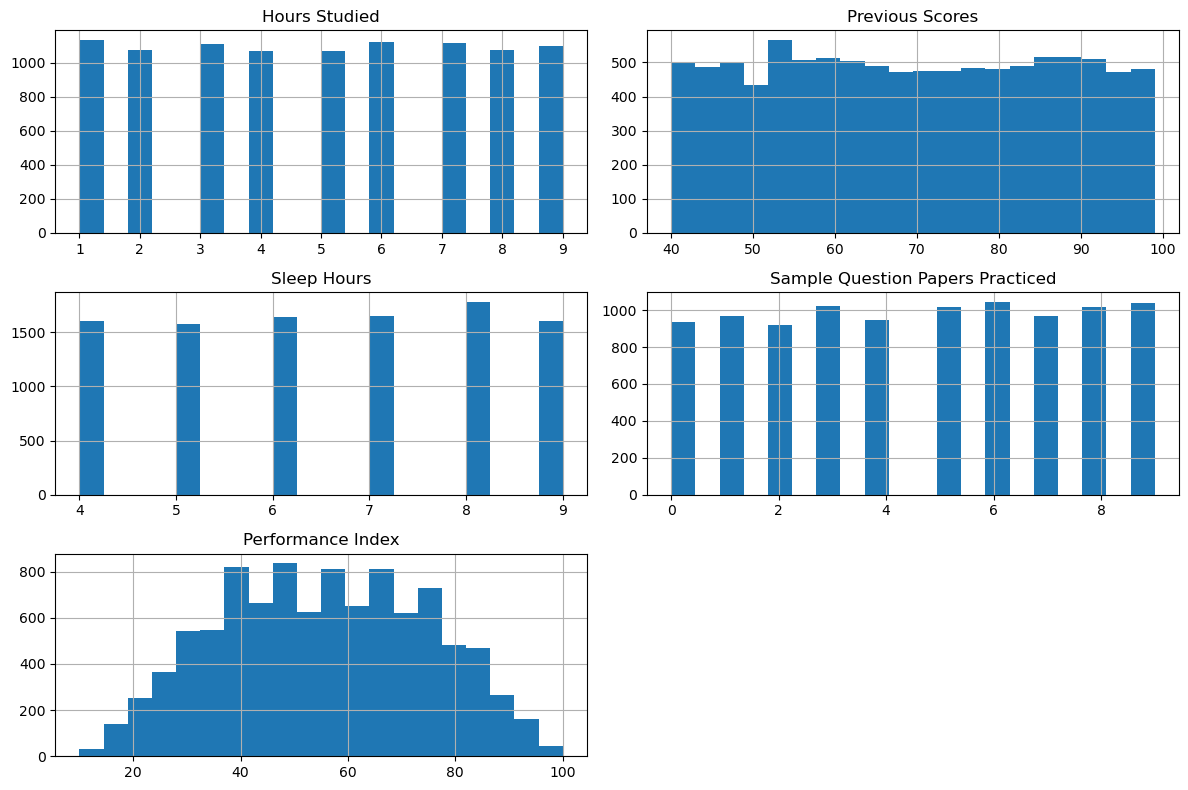

In [58]:
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Other way
# graph = df.select_dtypes(include=np.number).hist(figsize=(10,6))
# plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

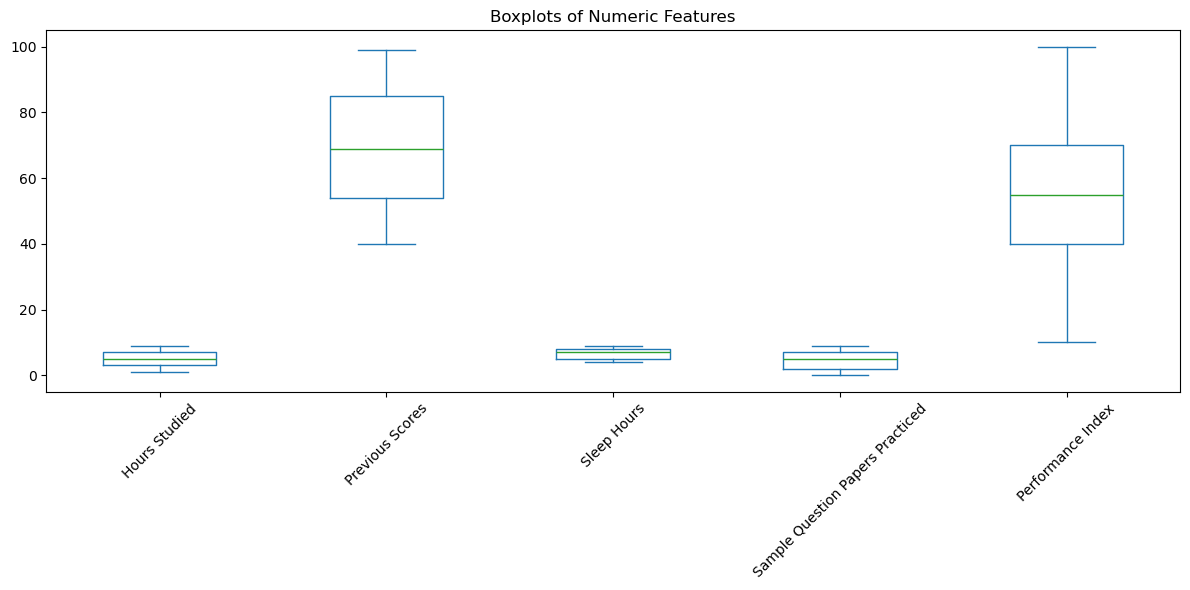

In [59]:
plt.figure(figsize=(12, 6))
df[numeric_cols].plot(kind="box", subplots=False, figsize=(12, 6))
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

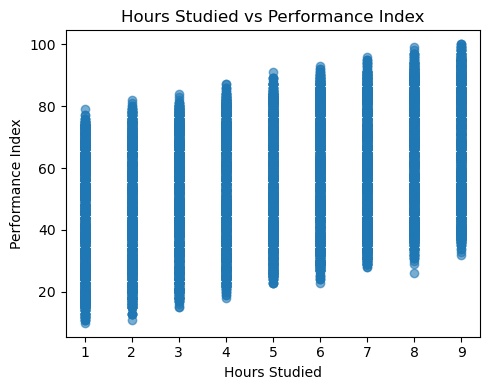

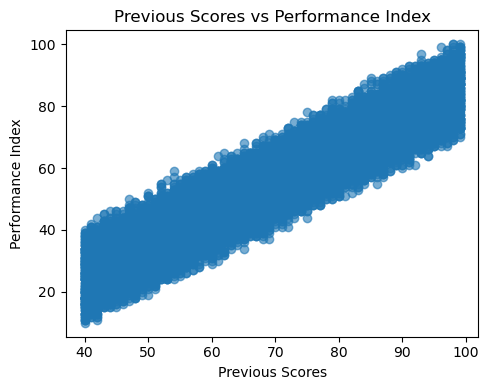

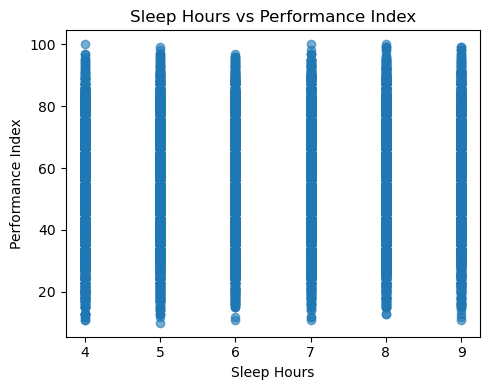

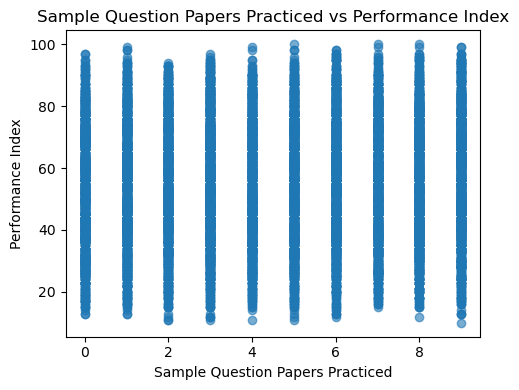

In [60]:
target = "Performance Index"  # adjust if your target column is named differently
for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(5,4))
        plt.scatter(df[col], df[target], alpha=0.6)
        plt.xlabel(col)
        plt.ylabel(target)
        plt.title(f"{col} vs {target}")
        plt.tight_layout()
        plt.show()

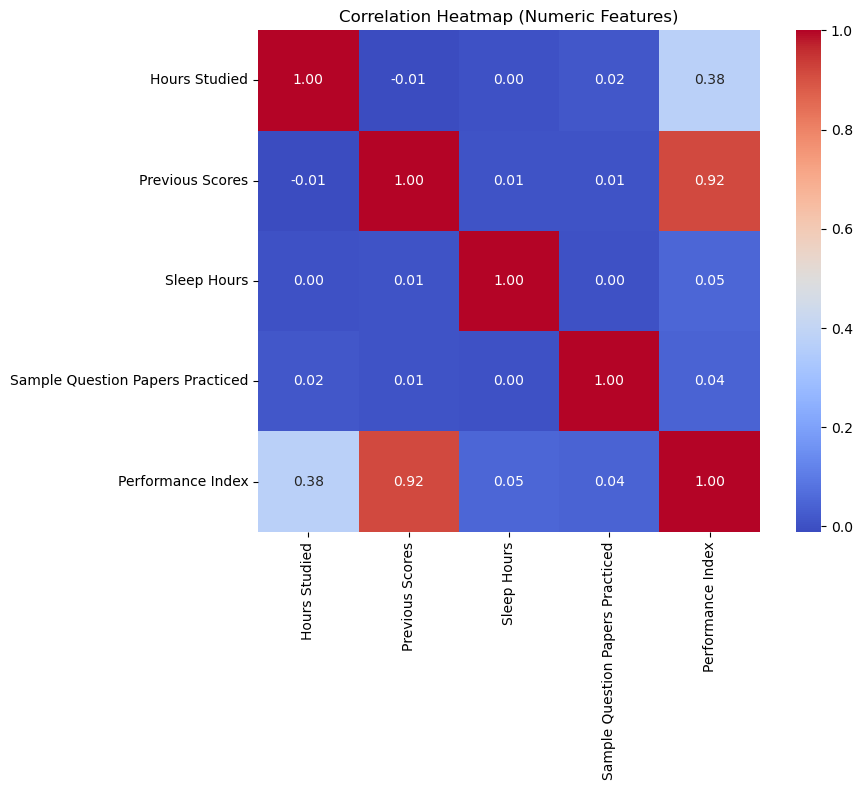

In [61]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=np.number).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap= "coolwarm", fmt=".2f", square=True) #cmap= "coolwarm", if I want to change the color 
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


## 2. Data Preprocessing


In [67]:
# Define your target
target = "Performance Index"   # adjust if different
X = df.drop(columns=[target])
y = df[target]

# Explicitly force types
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical:", categorical_cols)
print("Numeric:", numeric_cols)

Categorical: ['Extracurricular Activities']
Numeric: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']


In [71]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

In [72]:
encoding = pd.get_dummies(X, columns = numeric_cols , drop_first = True, dtype=int)

print("Encoded shape:", encoding.shape)
encoding.head()

Encoded shape: (9873, 82)


,Extracurricular Activities,Hours Studied_2,Hours Studied_3,Hours Studied_4,Hours Studied_5,Hours Studied_6,Hours Studied_7,Hours Studied_8,Hours Studied_9,Previous Scores_41,Previous Scores_42,Previous Scores_43,Previous Scores_44,Previous Scores_45,Previous Scores_46,Previous Scores_47,Previous Scores_48,Previous Scores_49,Previous Scores_50,Previous Scores_51,Previous Scores_52,Previous Scores_53,Previous Scores_54,Previous Scores_55,Previous Scores_56,Previous Scores_57,Previous Scores_58,Previous Scores_59,Previous Scores_60,Previous Scores_61,Previous Scores_62,Previous Scores_63,Previous Scores_64,Previous Scores_65,Previous Scores_66,Previous Scores_67,Previous Scores_68,Previous Scores_69,Previous Scores_70,Previous Scores_71,Previous Scores_72,Previous Scores_73,Previous Scores_74,Previous Scores_75,Previous Scores_76,Previous Scores_77,Previous Scores_78,Previous Scores_79,Previous Scores_80,Previous Scores_81,Previous Scores_82,Previous Scores_83,Previous Scores_84,Previous Scores_85,Previous Scores_86,Previous Scores_87,Previous Scores_88,Previous Scores_89,Previous Scores_90,Previous Scores_91,Previous Scores_92,Previous Scores_93,Previous Scores_94,Previous Scores_95,Previous Scores_96,Previous Scores_97,Previous Scores_98,Previous Scores_99,Sleep Hours_5,Sleep Hours_6,Sleep Hours_7,Sleep Hours_8,Sleep Hours_9,Sample Question Papers Practiced_1,Sample Question Papers Practiced_2,Sample Question Papers Practiced_3,Sample Question Papers Practiced_4,Sample Question Papers Practiced_5,Sample Question Papers Practiced_6,Sample Question Papers Practiced_7,Sample Question Papers Practiced_8,Sample Question Papers Practiced_9
0,Yes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
1,No,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Yes,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,Yes,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [73]:
# Split the dataset into training and testing sets
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Train shape: (7898, 5)  Test shape: (1975, 5)


## 3. Build the Regression Model 
#### Train Linear Regression Model

In [74]:
model = Pipeline(steps=[
    ("prep", preprocessor),
    ("linreg", LinearRegression())
])

model.fit(X_train, y_train)
print("Model trained.")

Model trained.



### Analyze Coefficients


In [75]:
def get_feature_names(column_transformer, input_features):
    output_features = []
    for name, trans, cols in column_transformer.transformers_:
        if hasattr(trans, "get_feature_names_out"):
            feature_names = list(trans.get_feature_names_out(cols))
        elif trans == "passthrough":
            feature_names = cols
        else:
            feature_names = cols
        output_features.extend(feature_names)
    return output_features

linreg = model.named_steps["linreg"]
prep = model.named_steps["prep"]

feature_names = get_feature_names(prep, X_train.columns)
coefs = pd.Series(linreg.coef_, index=feature_names).sort_values(ascending=False)

print(f"Intercept: {linreg.intercept_:.4f}")
display(coefs.to_frame("coefficient"))

Intercept: -33.9813


,coefficient
Hours Studied,2.851022
Previous Scores,1.018430
Extracurricular Activities_Yes,0.573823
Sleep Hours,0.472073
Sample Question Papers Practiced,0.188704



## 4. Evaluate the Model


In [76]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 4.3059
RMSE: 2.0751
R²  : 0.9884


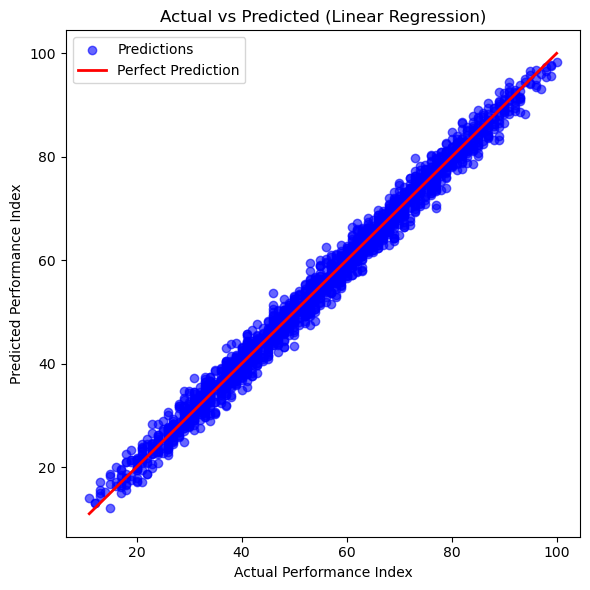

In [78]:
# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red", linewidth=2, label="Perfect Prediction"
)

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted (Linear Regression)")
plt.legend()
plt.tight_layout()
plt.show()